In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

## 1. 데이터 로드

In [11]:
mnist = datasets.fetch_mldata('MNIST original', data_home='./data/')
mnist

/Users/emjayahn/.pyenv/versions/3.7.0/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/emjayahn/.pyenv/versions/3.7.0/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [14]:
# mnist data 정규화
mnist_data = mnist.data / 255

# DataFrame 에서 보기
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


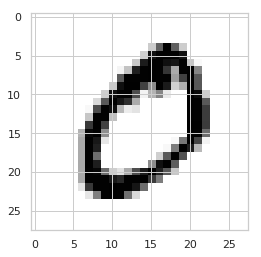

In [17]:
# 1번째 sample 이미지 보기
plt.imshow(mnist_data[0].reshape(28, -1), cmap=cm.gray_r)
plt.show()

In [18]:
# label 확인
mnist_label = mnist.target
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [21]:
# 훈련 데이터 사이즈
train_size = 5000
# 테스트 데이터 사이즈
test_size = 500

X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, train_size=train_size, \
                                                    test_size=test_size, random_state=0)

## 2. 텐서 만들기

In [22]:
# Train Data -> Tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

# Test Data -> Tensor
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Check tensor size
print(X_train.shape)
print(y_train.shape)

torch.Size([5000, 784])
torch.Size([5000])


## 3. Feature + Target Tensor 합치기

In [26]:
# 텐서 합치기
train = TensorDataset(X_train, y_train)

# 텐서의 첫 번째 데이터 확인
print(train[0])
print(len(train[0][0]))

# miniBatch 만들기
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

## 4. 모델링

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

## 5. 학습

In [33]:
model = Net()

In [34]:
# 오차함수
criterion = nn.CrossEntropyLoss()

# 최적화
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습
for epoch in range(1000):
    total_loss = 0
    for X_train, y_train in train_loader:
        X_train, y_train = Variable(X_train), Variable(y_train)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        total_loss += float(loss.data)
    if (epoch + 1) % 100 == 0:
        print(epoch+1, total_loss)

100 27.739127963781357
200 1.5359582379460335
300 0.1543041288969107
400 0.058492615818977356
500 0.03339964052429423
600 0.02253973131882958
700 0.016677535459166393
800 0.013078217030852102
900 0.010667617003491614
1000 0.0089447051868774


## 성능확인

In [40]:
X_test, y_test = Variable(X_test), Variable(y_test)
result = torch.max(model(X_test), 1)[1]
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())
accuracy

0.906

## Dropout 을 추가한 모델의 성능

In [48]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [53]:
class Drop_Net(nn.Module):
    def __init__(self):
        super(Drop_Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

In [54]:
model_dropout = Drop_Net()

In [56]:
# 오차함수
criterion = nn.CrossEntropyLoss()

# 최적화
optimizer = optim.SGD(model_dropout.parameters(), lr=0.01)

# 학습
for epoch in range(1000):
    total_loss = 0
    for X_train, y_train in train_loader:
        X_train, y_train = Variable(X_train), Variable(y_train)
        optimizer.zero_grad()
        output = model_dropout(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        total_loss += float(loss.data)
    if (epoch + 1) % 100 == 0:
        print(epoch+1, total_loss)

100 38.13773435354233
200 3.576127078384161
300 0.5743268299847841
400 0.22962634288705885
500 0.15404868690529838
600 0.0991973726922879
700 0.06559618974279147
800 0.06375375873176381
900 0.06589458137750626
1000 0.05481469829828711


In [57]:
X_test, y_test = Variable(X_test), Variable(y_test)
result = torch.max(model_dropout(X_test), 1)[1]
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())
accuracy

0.906